In [1]:
import pandas as pd
import numpy as np
import os
import nltk



In [2]:
folder_path = r"C:\Users\ruoxi\Documents\Final project\sub_reddit_brand"


In [3]:
dfs = []
for file_name in os.listdir(folder_path):
    if file_name.endswith('.csv'):
        file_path = os.path.join(folder_path, file_name)
        df = pd.read_csv(file_path)
        dfs.append(df)
dfs

[                                               Comments    Make
 0     I spoke with Abarth Spain & Germany. Both told...  abarth
 1            The smaller the car the bigger the dick. 😏  abarth
 2     I've been looking at this too, it seems the ki...  abarth
 3                         Mine is Celeste blue as well.  abarth
 4     Katskinz is a really nice recover. Not just fa...  abarth
 ...                                                 ...     ...
 2306  Make sure the battery connectors are tight and...  abarth
 2307  Do you have a piggyback ECU mod? I got rid of ...  abarth
 2308               You know it did cross my mind lol. 😊  abarth
 2309  anything i should lookout for on the test driv...  abarth
 2310  This isn’t an Abarth in the video, but might b...  abarth
 
 [2311 rows x 2 columns],
                                                Comments       Make
 0     When you say Sharper curves, can you give an e...  AlfaRomeo
 1                     Alfa’s are for drivers. Worth it!

In [4]:
comments = pd.concat(dfs, ignore_index=True)


Data Cleaning

In [5]:
comments.shape

(125638, 2)

In [6]:
comments.head()

,Comments,Make
0,I spoke with Abarth Spain & Germany. Both told...,abarth
1,The smaller the car the bigger the dick. 😏,abarth
2,"I've been looking at this too, it seems the ki...",abarth
3,Mine is Celeste blue as well.,abarth
4,Katskinz is a really nice recover. Not just fa...,abarth


In [7]:
comments.tail()

,Comments,Make
125633,Wow I didnt know Costco was international... O...,Volvo
125634,"I'm pretty happy with this situation, I was ab...",Volvo
125635,The 2020 xc40 has an option to shut it off per...,Volvo
125636,Break out the tire repair foam and fix it.. Oh...,Volvo
125637,Stud.,Volvo


In [8]:
len(comments['Make'].unique())

57

In [9]:
# change the brand name back to match the Price dataset
brand_name_mapping= {'AlfaRomeo':'Alfa Romeo', 'BMW': 'Bmw', 'peugeot':'Peugeot',
                      'mercedes_benz':'Mercedes Benz', 'skoda': 'Škoda', 'mazda': 'Mazda',
                      'seat': 'Seat', 'kia': 'Kia', 'opel': 'Opel', 'LandRover': 'Land Rover', 
                      'saic': 'Saic', 'SmartCar': 'Smart', 'mitsubishi': 'Mitsubishi', 'abarth': 'Abarth', 
                      'MINI': 'Mini', 'mclaren': 'Mclaren', 'CupraFormentor': 'Cupra', 'SsangYong': 'Ssangyong', 
                       'subaru': 'Subaru', 'lancia': 'Lancia', 'teslamotors': 'Tesla', 'DSAutomobiles': 'Ds Automobiles',
                    'rollsroyce': 'Rolls Royce', 'chrysler': 'Chrysler', 'lamborghini': 'Lamborghini', 'saab': 'Saab', 'ineosgrenadier': 'Ineos', 
                    'lincoln': 'Lincoln', 'BYD': 'Byd', 'infiniti': 'Infiniti', 'AstonMartin': 'Aston Martin'}

In [10]:
# Apply mapping to values in 'Make' column
comments['Make'] = comments['Make'].map(lambda x: brand_name_mapping.get(x, x))

In [11]:
comments['Make'].unique()

array(['Abarth', 'Alfa Romeo', 'Alpina', 'Aston Martin', 'Audi',
       'Bentley', 'Bmw', 'Byd', 'Cadillac', 'Chevrolet', 'Chrysler',
       'Citroen', 'Cupra', 'Dacia', 'Dodge', 'Ds Automobiles', 'Ferrari',
       'Fiat', 'Ford', 'Honda', 'Hummer', 'Hyundai', 'Ineos', 'Infiniti',
       'Isuzu', 'Jaguar', 'Jeep', 'Kia', 'Lamborghini', 'Lancia',
       'Land Rover', 'Lexus', 'Lincoln', 'Maserati', 'Mazda', 'Mclaren',
       'Mercedes Benz', 'Mini', 'Mitsubishi', 'Nissan', 'Opel', 'Peugeot',
       'Porsche', 'Renault', 'Rolls Royce', 'Saab', 'Saic', 'Seat',
       'Škoda', 'Smart', 'Ssangyong', 'Subaru', 'Suzuki', 'Tesla',
       'Toyota', 'Volkswagen', 'Volvo'], dtype=object)

In [12]:
comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125638 entries, 0 to 125637
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Comments  125636 non-null  object
 1   Make      125638 non-null  object
dtypes: object(2)
memory usage: 1.9+ MB


In [13]:
# check the column "Comments" to make sure there are no empty or useless data(for instance, only numbers)
comments.dropna(inplace=True)
# Convert the 'Comments' column to numeric, coercing errors to NaN
comments['Comments_numeric'] = pd.to_numeric(comments['Comments'], errors='coerce')

# Identify the rows where the 'Comments_numeric' column contains only numerical values
num_rows_mask = comments['Comments_numeric'].notnull()

comments[num_rows_mask]



,Comments,Make,Comments_numeric
1130,2019,Abarth,2.019000e+03
3874,159,Alfa Romeo,1.590000e+02
3973,939,Alfa Romeo,9.390000e+02
4954,2410109,Alpina,2.410109e+06
8983,2018,Audi,2.018000e+03
...,...,...,...
95989,21,Subaru,2.100000e+01
107191,1.9999999999,Tesla,2.000000e+00
112593,2.6,Tesla,2.600000e+00
112896,2.69420,Tesla,2.694200e+00


In [14]:
pd.set_option('display.max_rows', None)

In [15]:
# Delete the rows where the 'Comments' column contains only float values
comments = comments[~num_rows_mask]

# Drop the 'Comments_numeric' column as it's no longer needed
comments.drop(columns=['Comments_numeric'], inplace=True)

# Reset the index
comments.reset_index(drop=True, inplace=True)

comments.head()



,Comments,Make
0,I spoke with Abarth Spain & Germany. Both told...,Abarth
1,The smaller the car the bigger the dick. 😏,Abarth
2,"I've been looking at this too, it seems the ki...",Abarth
3,Mine is Celeste blue as well.,Abarth
4,Katskinz is a really nice recover. Not just fa...,Abarth


In [16]:
comments.shape

(125562, 2)

Emoji-to-Text Conversion

In [17]:
#!pip install emoji

In [18]:
import emoji

In [19]:
def emoji_to_text(row):
    text_no_emoji=emoji.demojize(row)
    return text_no_emoji
comments['demojized'] = comments['Comments'].apply(emoji_to_text)
comments.head()

,Comments,Make,demojized
0,I spoke with Abarth Spain & Germany. Both told...,Abarth,I spoke with Abarth Spain & Germany. Both told...
1,The smaller the car the bigger the dick. 😏,Abarth,The smaller the car the bigger the dick. :smir...
2,"I've been looking at this too, it seems the ki...",Abarth,"I've been looking at this too, it seems the ki..."
3,Mine is Celeste blue as well.,Abarth,Mine is Celeste blue as well.
4,Katskinz is a really nice recover. Not just fa...,Abarth,Katskinz is a really nice recover. Not just fa...


Tokenization

In [20]:

from nltk.tokenize import word_tokenize 


In [23]:
def tokenizer_and_remove_punctuation(row):
  tokens = word_tokenize(row['demojized'])
  return [word.lower() for word in tokens if word.isalpha()]

comments['tokenized'] = comments.apply(tokenizer_and_remove_punctuation,axis=1)
comments.head()

,Comments,Make,demojized,tokenized
0,I spoke with Abarth Spain & Germany. Both told...,Abarth,I spoke with Abarth Spain & Germany. Both told...,"[i, spoke, with, abarth, spain, germany, both,..."
1,The smaller the car the bigger the dick. 😏,Abarth,The smaller the car the bigger the dick. :smir...,"[the, smaller, the, car, the, bigger, the, dick]"
2,"I've been looking at this too, it seems the ki...",Abarth,"I've been looking at this too, it seems the ki...","[i, been, looking, at, this, too, it, seems, t..."
3,Mine is Celeste blue as well.,Abarth,Mine is Celeste blue as well.,"[mine, is, celeste, blue, as, well]"
4,Katskinz is a really nice recover. Not just fa...,Abarth,Katskinz is a really nice recover. Not just fa...,"[katskinz, is, a, really, nice, recover, not, ..."


Lemmatization

In [24]:
nltk.download('wordnet') # wordnet is the most well known lemmatizer for english
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ruoxi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ruoxi\AppData\Roaming\nltk_data...


In [25]:
# Part of speech
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ruoxi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [26]:
#pos_tag and lemmatize use different codes for parts of speech
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper() # gets first letter of POS categorization
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN) # get returns second argument if first key does not exist


In [27]:

lemmatizer = WordNetLemmatizer()

def lemmatizer_with_pos(row):
  return [lemmatizer.lemmatize(word,get_wordnet_pos(word)) for word in row['tokenized']]

comments['lemmatized'] = comments.apply(lemmatizer_with_pos,axis=1)
comments.head()

,Comments,Make,demojized,tokenized,lemmatized
0,I spoke with Abarth Spain & Germany. Both told...,Abarth,I spoke with Abarth Spain & Germany. Both told...,"[i, spoke, with, abarth, spain, germany, both,...","[i, spoke, with, abarth, spain, germany, both,..."
1,The smaller the car the bigger the dick. 😏,Abarth,The smaller the car the bigger the dick. :smir...,"[the, smaller, the, car, the, bigger, the, dick]","[the, small, the, car, the, big, the, dick]"
2,"I've been looking at this too, it seems the ki...",Abarth,"I've been looking at this too, it seems the ki...","[i, been, looking, at, this, too, it, seems, t...","[i, be, look, at, this, too, it, seem, the, ki..."
3,Mine is Celeste blue as well.,Abarth,Mine is Celeste blue as well.,"[mine, is, celeste, blue, as, well]","[mine, be, celeste, blue, a, well]"
4,Katskinz is a really nice recover. Not just fa...,Abarth,Katskinz is a really nice recover. Not just fa...,"[katskinz, is, a, really, nice, recover, not, ...","[katskinz, be, a, really, nice, recover, not, ..."


Remove Stop Words

In [28]:
from nltk.corpus import stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ruoxi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [29]:
def remove_sw(row):
  return list(set(row['lemmatized']).difference(stopwords.words()))

comments['no_stopwords'] = comments.apply(remove_sw,axis=1)
comments.head()

,Comments,Make,demojized,tokenized,lemmatized,no_stopwords
0,I spoke with Abarth Spain & Germany. Both told...,Abarth,I spoke with Abarth Spain & Germany. Both told...,"[i, spoke, with, abarth, spain, germany, both,...","[i, spoke, with, abarth, spain, germany, both,...","[spoke, told, interest, recommend, abarth, rea..."
1,The smaller the car the bigger the dick. 😏,Abarth,The smaller the car the bigger the dick. :smir...,"[the, smaller, the, car, the, bigger, the, dick]","[the, small, the, car, the, big, the, dick]","[big, small, dick, car]"
2,"I've been looking at this too, it seems the ki...",Abarth,"I've been looking at this too, it seems the ki...","[i, been, looking, at, this, too, it, seems, t...","[i, be, look, at, this, too, it, seem, the, ki...","[avoid, cut, response, ramair, prone, airtec, ..."
3,Mine is Celeste blue as well.,Abarth,Mine is Celeste blue as well.,"[mine, is, celeste, blue, as, well]","[mine, be, celeste, blue, a, well]","[blue, celeste]"
4,Katskinz is a really nice recover. Not just fa...,Abarth,Katskinz is a really nice recover. Not just fa...,"[katskinz, is, a, really, nice, recover, not, ...","[katskinz, be, a, really, nice, recover, not, ...","[fabric, seat, katskinz, nice, recover]"


Plot the frequecy of the words(e.g. Porsche, Škoda)

In [30]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [33]:
def plot_word_cloud(Make):
    words_brand = comments['no_stopwords'][comments['Make'] == Make]
    words_brand_flattened = [word for sublist in words_brand for word in sublist]
    # Join all the words into a single string
    text = ' '.join(words_brand_flattened)

    # Create a WordCloud object
    wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

    # Plot the WordCloud image
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Hide the axes
    return plt.show()

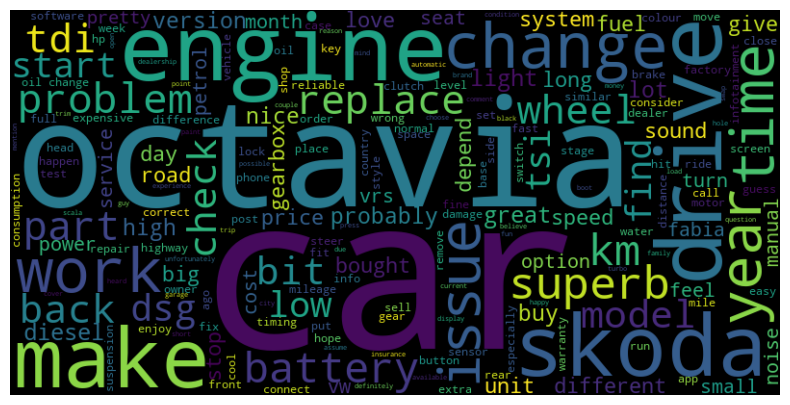

In [36]:
plot_word_cloud('Škoda')

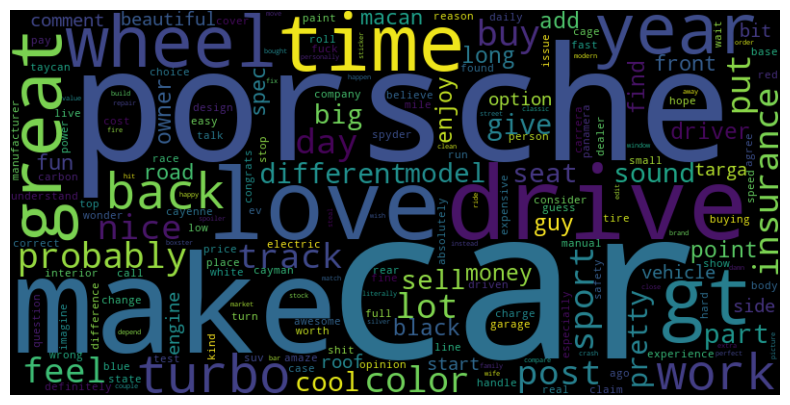

In [38]:
plot_word_cloud('Porsche')

In [39]:
def plot_word_freq(Make):
    words_brand = comments['no_stopwords'][comments['Make'] == Make]
    words_brand_flattened = [word for sublist in words_brand for word in sublist]

    freq = nltk.FreqDist(words_brand_flattened)

    return freq.plot(20, cumulative=False)

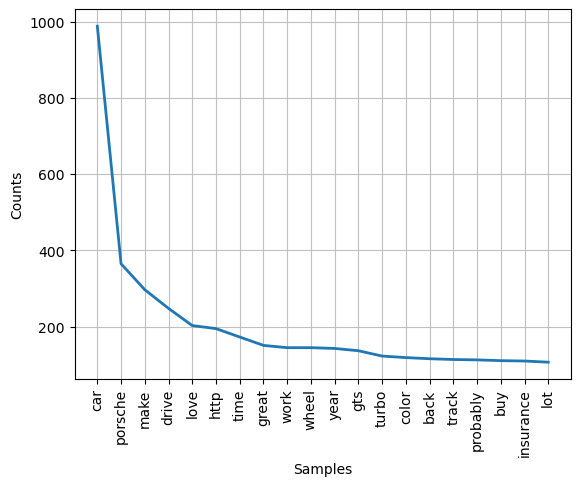

<Axes: xlabel='Samples', ylabel='Counts'>

In [40]:
plot_word_freq('Porsche')

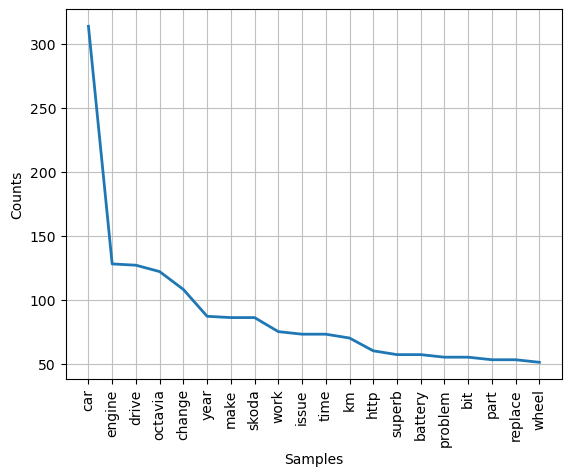

<Axes: xlabel='Samples', ylabel='Counts'>

In [41]:
plot_word_freq('Škoda')

Put the words back together 

In [42]:
def re_blob(row):
  return " ".join(row['no_stopwords'])

comments['clean_blob'] = comments.apply(re_blob,axis=1)
comments.head()

,Comments,Make,demojized,tokenized,lemmatized,no_stopwords,clean_blob
0,I spoke with Abarth Spain & Germany. Both told...,Abarth,I spoke with Abarth Spain & Germany. Both told...,"[i, spoke, with, abarth, spain, germany, both,...","[i, spoke, with, abarth, spain, germany, both,...","[spoke, told, interest, recommend, abarth, rea...",spoke told interest recommend abarth reason th...
1,The smaller the car the bigger the dick. 😏,Abarth,The smaller the car the bigger the dick. :smir...,"[the, smaller, the, car, the, bigger, the, dick]","[the, small, the, car, the, big, the, dick]","[big, small, dick, car]",big small dick car
2,"I've been looking at this too, it seems the ki...",Abarth,"I've been looking at this too, it seems the ki...","[i, been, looking, at, this, too, it, seems, t...","[i, be, look, at, this, too, it, seem, the, ki...","[avoid, cut, response, ramair, prone, airtec, ...",avoid cut response ramair prone airtec kit whi...
3,Mine is Celeste blue as well.,Abarth,Mine is Celeste blue as well.,"[mine, is, celeste, blue, as, well]","[mine, be, celeste, blue, a, well]","[blue, celeste]",blue celeste
4,Katskinz is a really nice recover. Not just fa...,Abarth,Katskinz is a really nice recover. Not just fa...,"[katskinz, is, a, really, nice, recover, not, ...","[katskinz, be, a, really, nice, recover, not, ...","[fabric, seat, katskinz, nice, recover]",fabric seat katskinz nice recover


Sentiment Intensity Analyzer 

In [43]:
nltk.download("vader_lexicon")
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ruoxi\AppData\Roaming\nltk_data...


In [52]:
sia =SIA()
results =[]
for index, row in comments.iterrows():
    pol_score['Comment'] = row['Comments']
    pol_score['Make'] = row['Make']
    pol_score = sia.polarity_scores(row['clean_blob'])
    results.append(pol_score)

In [53]:
df=pd.DataFrame.from_records(results)
df.head()

,neg,neu,pos,compound,Comment,Make
0,0.072,0.515,0.412,0.7650,The smaller the car the bigger the dick. 😏,Abarth
1,0.524,0.476,0.000,-0.5106,"I've been looking at this too, it seems the ki...",Abarth
2,0.350,0.650,0.000,-0.5106,Mine is Celeste blue as well.,Abarth
3,0.000,1.000,0.000,0.0000,Katskinz is a really nice recover. Not just fa...,Abarth
4,0.000,0.588,0.412,0.4215,I drove that car on Saturday. It drove nice fo...,Abarth


In [ ]:
df['label'] = 'neutral'
df.loc[df['compound']>0.25, 'label'] ='positive'
df.loc[df['compound']<-0.25, 'label'] = 'negative'

In [55]:
df.head()

,neg,neu,pos,compound,Comment,Make,label
0,0.072,0.515,0.412,0.7650,The smaller the car the bigger the dick. 😏,Abarth,positive
1,0.524,0.476,0.000,-0.5106,"I've been looking at this too, it seems the ki...",Abarth,negative
2,0.350,0.650,0.000,-0.5106,Mine is Celeste blue as well.,Abarth,negative
3,0.000,1.000,0.000,0.0000,Katskinz is a really nice recover. Not just fa...,Abarth,neuatral
4,0.000,0.588,0.412,0.4215,I drove that car on Saturday. It drove nice fo...,Abarth,positive


In [57]:
df.to_csv('sentiment_analysis_reddit.csv', index=False)

In [58]:
comments.to_csv('sentiment_analysis_process.csv', index=False)

(array([ 1723.,  4400.,  9451.,  7645., 56659.,  4651.,  9939., 15718.,
        10297.,  5079.]),
 array([-0.993  , -0.79389, -0.59478, -0.39567, -0.19656,  0.00255,
         0.20166,  0.40077,  0.59988,  0.79899,  0.9981 ]),
 <BarContainer object of 10 artists>)

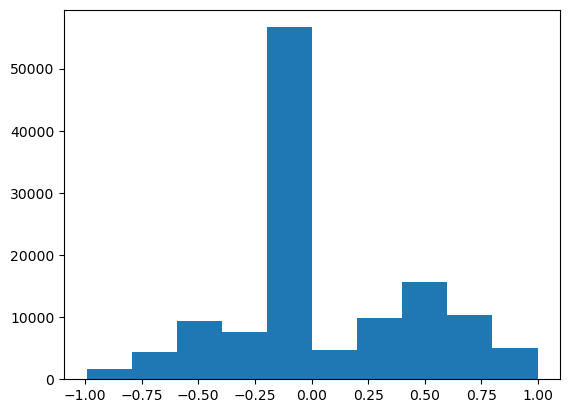

In [18]:
plt.hist(df['compound'])

Most of the comments are in neutral position, but each brand may vary in the result

In [19]:
def plot_pol_score(Make):
    df_brand_scores = df[df['Make'] == Make]['compound']
    plt.hist(df_brand_scores)
    plt.title(f'The distribution of the compound scores for the brand {Make}')
    return plt.show()

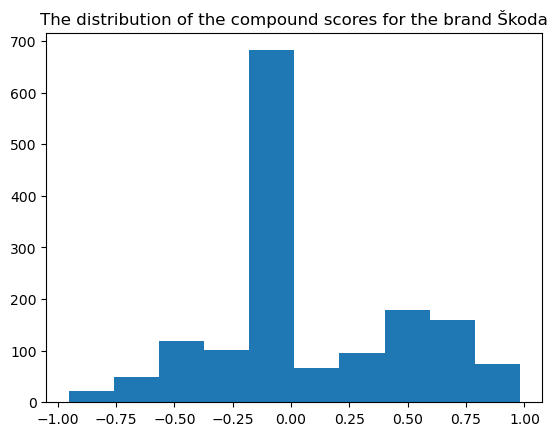

In [24]:
plot_pol_score('Škoda')

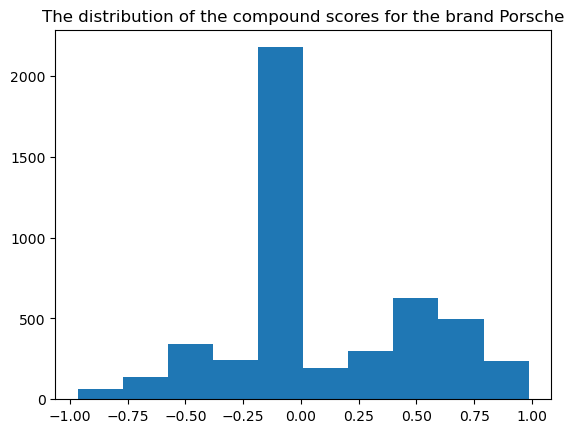

In [23]:
plot_pol_score('Porsche')